In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()  # all the data types are float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.describe() 

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
data.shape

(200, 5)

In [7]:
data = data.drop(['Unnamed: 0'],axis =1)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


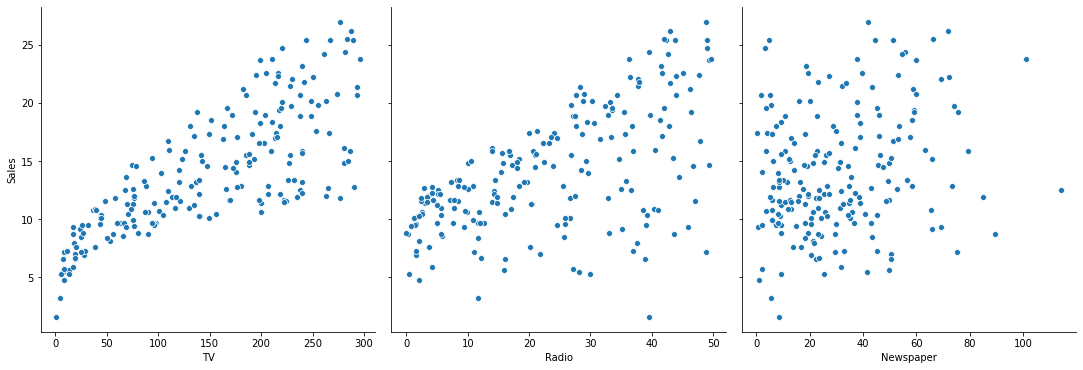

In [8]:
sns.pairplot(data,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",size = 5,kind = "scatter")

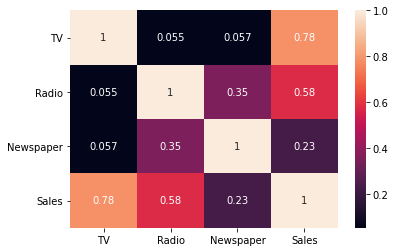

In [9]:
sns.heatmap(data.corr(),annot =True)
plt.show()

## Model 1 = feature : 'TV'

In [10]:
x = data["TV"]
y = data["Sales"]

In [11]:
#splittiong data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.7,test_size=0.3,random_state=5)

In [12]:
x_train = x_train.values.reshape(-1,1) # this step is required only if there is single variable
x_test = x_test.values.reshape(-1,1)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(f'intercept : {lm.intercept_}')
print(f'coefficient : {lm.coef_}')

intercept : 6.745302251222066
coefficient : [0.05024351]


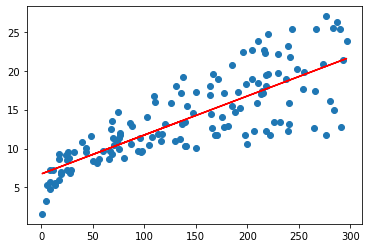

In [15]:
# regression scatter plot
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.745 + 0.050 * x_train, 'r')
plt.show()

In [16]:
y_train_pred = lm.predict(x_train)

In [17]:
res = y_train - y_train_pred

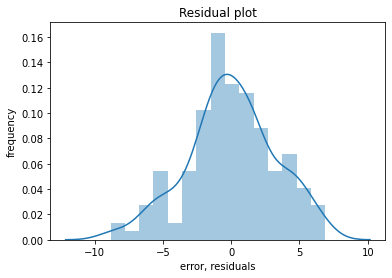

In [18]:
sns.distplot(res, bins = 15) # training residual plot
plt.title("Residual plot")
plt.xlabel("error, residuals")
plt.ylabel("frequency")
plt.show()

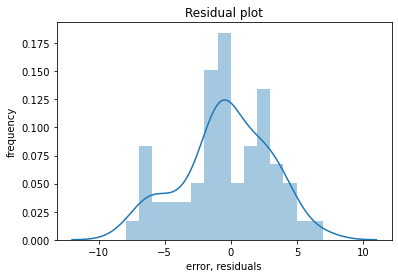

In [19]:
y_test_pred = lm.predict(x_test)
res_test = y_test - y_test_pred        ## testing residual plot
sns.distplot(res_test, bins = 15)
plt.title("Residual plot")
plt.xlabel("error, residuals")
plt.ylabel("frequency")
plt.show()

In [20]:
from sklearn.metrics import r2_score # R square
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6411433688483876
0.5111616978794155


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, x_train ,y_train, scoring = 'r2', cv = 7)
print("Cross-validated R^2 scores:", scores)
print("Mean R^2:", scores.mean())

Cross-validated R^2 scores: [0.69741289 0.53516548 0.55209045 0.53745542 0.63419915 0.70257199
 0.76024534]
Mean R^2: 0.6313058180634414


## Model 2 : feature = Tv + Radio + Newspaper

In [22]:
feature = ['TV','Radio','Newspaper']
x = data[feature]
y = data["Sales"]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.7,test_size=0.3,random_state=5)

In [24]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(f"intercept {lm.intercept_}")
coef = list(lm.coef_)
print(f"coefficient {lm.coef_}")

intercept 2.9787673054549177
coefficient [ 0.04668512  0.18501553 -0.00153043]


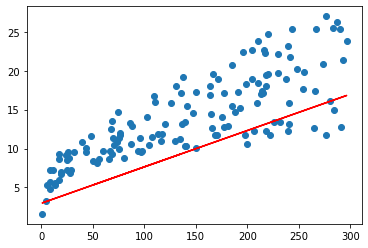

In [27]:
plt.scatter(x_train['TV'],y_train)
plt.plot(x_train['TV'], 2.978 + coef[0] * x_train['TV'], 'r')
plt.show()

In [28]:
x_train = np.array(x_train)

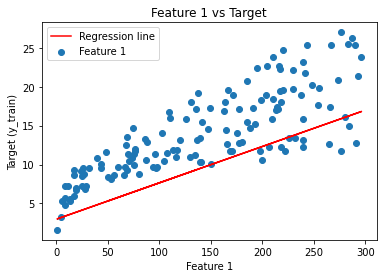

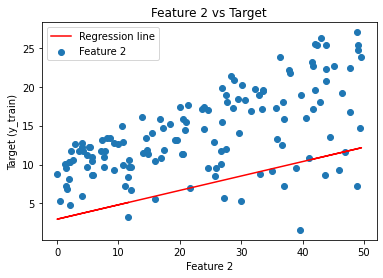

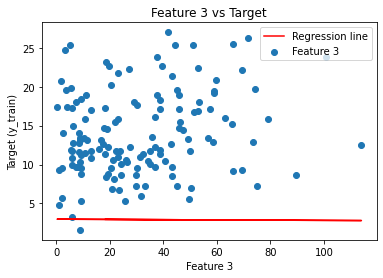

In [29]:
for i in range(len(coef)):
        plt.figure()  # Create a new figure for each feature
        plt.scatter(x_train[:,i], y_train, label=f"Feature {i+1}")
        plt.plot(x_train[:,i], 2.978 + coef[i] * x_train[:,i], 'r', label="Regression line")
        plt.xlabel(f"Feature {i + 1}")
        plt.ylabel("Target (y_train)")
        plt.legend()
        plt.title(f"Feature {i + 1} vs Target")
        plt.show()

In [30]:
y_train_pred = lm.predict(x_train)

In [31]:
res = y_train - y_train_pred

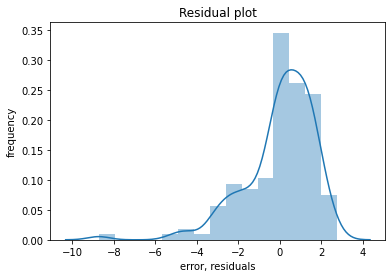

In [32]:
sns.distplot(res, bins = 15) # training residual plot
plt.title("Residual plot")
plt.xlabel("error, residuals")
plt.ylabel("frequency")
plt.show()

In [33]:
y_test_pred = lm.predict(x_test)

In [34]:
res_test = y_test - y_test_pred

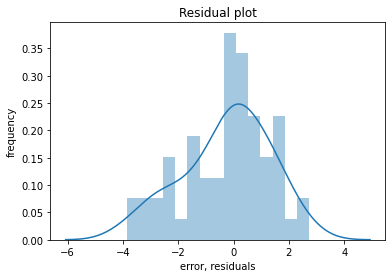

In [35]:
 ## testing residual plot
sns.distplot(res_test, bins = 15)
plt.title("Residual plot")
plt.xlabel("error, residuals")
plt.ylabel("frequency")
plt.show()

In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8997682984995
0.8868821951328664


In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
print("Cross-validated R^2 scores:", scores)
print("Mean R^2:", scores.mean())

Cross-validated R^2 scores: [0.95395975 0.75293501 0.93017193 0.86674943 0.93404767]
Mean R^2: 0.8875727579327162


## Model 3 : feature TV + Radio

In [38]:
feature1 = ['TV','Radio']
x = data[feature1]
y = data['Sales']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 24,train_size =0.7,test_size=0.3)

In [40]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(f'intercept : {lm.intercept_}')
coef = list(lm.coef_)
print(f'coefficients : {coef}')

intercept : 2.984998877501475
coefficients : [0.04527657920038791, 0.19026638083921918]


y_pred = 2.985+ x_train * Coef

In [42]:
x_train = np.array(x_train)

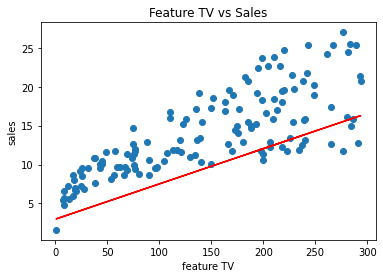

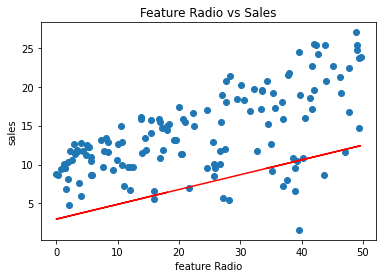

In [43]:
for i in range(len(coef)):
    plt.scatter(x_train[:,i], y_train, label = f'feature{i+1}')
    plt.plot(x_train[:,i],2.985 + x_train[:,i] * coef[i],'r',label = 'regression line')
    plt.xlabel(f'feature {feature1[i]}')
    plt.ylabel('sales')
    plt.title(f"Feature {feature[i]} vs Sales")
    plt.show()

In [44]:
y_train_pred = lm.predict(x_train)

In [45]:
res = y_train - y_train_pred

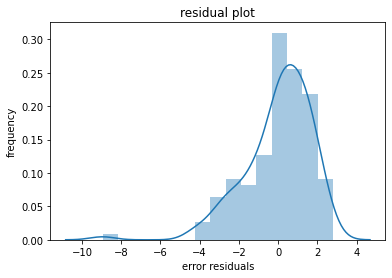

In [46]:
sns.distplot(res, bins =15)
plt.xlabel('error residuals')
plt.ylabel('frequency')
plt.title('residual plot')
plt.show()

In [47]:
y_test_pred = lm.predict(x_test)

In [48]:
res_test = y_test - y_test_pred

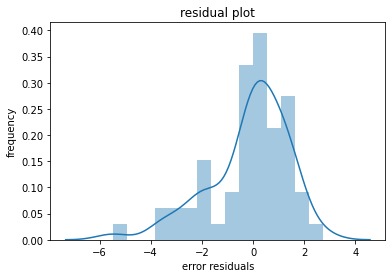

In [49]:
sns.distplot(res_test, bins =15)
plt.xlabel('error residuals')
plt.ylabel('frequency')
plt.title('residual plot')
plt.show()

In [50]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8952970038759398
0.9013669267154297


In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
print("Cross-validated R^2 scores:", scores)
print("Mean R^2:", scores.mean())

Cross-validated R^2 scores: [0.93296837 0.80485997 0.87975383 0.91455877 0.90144306]
Mean R^2: 0.8867167995631033


## Model 4 : feature radio + newspaper

In [52]:
feature2 = ['Radio','Newspaper']
x = data[feature2]
y = data['Sales']

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,test_size = 0.3,random_state = 98)

In [54]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(f'intercept : {lm.intercept_}')
coef = list(lm.coef_)
print(f'coefficient : {coef}')

intercept : 9.678201035211725
coefficient : [0.1959911847704644, 0.0007578052316918712]


In [56]:
x_train = np.array(x_train)

y = m*x+c 
y = coef * x_train + intercept

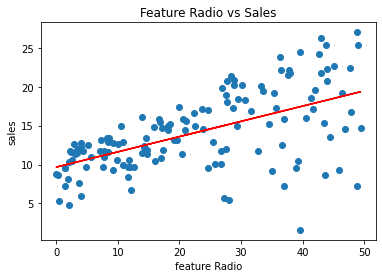

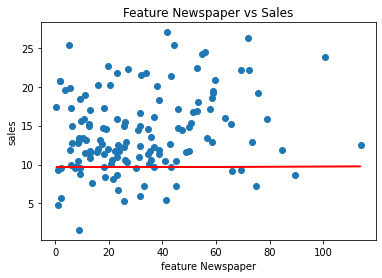

In [57]:
for i in range(len(coef)):
    plt.scatter(x_train[:,i],y_train, label = f'regression plot')
    plt.plot(x_train[:,i], 9.67 + x_train[:,i] * coef[i],'r',label = 'regression line')
    plt.xlabel(f'feature {feature2[i]}')
    plt.ylabel('sales')
    plt.title(f"Feature {feature2[i]} vs Sales")
    plt.show()

In [58]:
y_train_pred = lm.predict(x_train)

In [59]:
res = y_train - y_train_pred

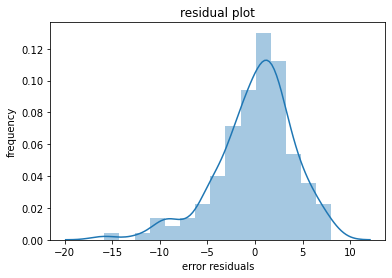

In [60]:
sns.distplot(res, bins =15)
plt.xlabel('error residuals')
plt.ylabel('frequency')
plt.title('residual plot')
plt.show()

In [61]:
y_test_pred= lm.predict(x_test)

In [62]:
res_test = y_test- y_test_pred

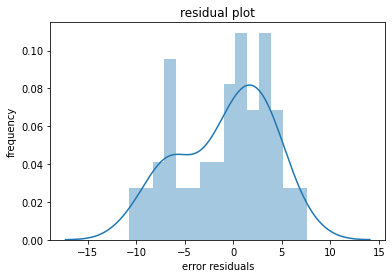

In [63]:
sns.distplot(res_test, bins =15)
plt.xlabel('error residuals')
plt.ylabel('frequency')
plt.title('residual plot')
plt.show()

In [64]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.33979341819193665
0.31070631160511175


In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
print("Cross-validated R^2 scores:", scores)
print("Mean R^2:", scores.mean())

Cross-validated R^2 scores: [ 0.02994648  0.46434193  0.25088693  0.52110302 -0.14829485]
Mean R^2: 0.22359670043587737


##   feature TV+Newspaper

In [66]:
feature3 = ['TV','Newspaper']
x = data[feature3]
y = data['Sales']

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,test_size = 0.3,random_state =45)

In [68]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
print(f'intercept : {lm.intercept_}')
coef = list(lm.coef_)
print(f'coefficient : {coef}')

intercept : 5.810804236562451
coefficient : [0.04774546219419314, 0.03521431480983801]


y = m*x+c
y = x *coef + 5.81

In [70]:
x_train = np.array(x_train)

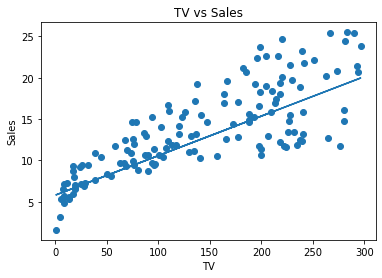

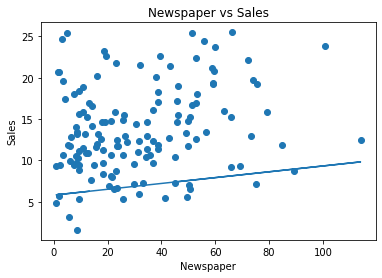

In [71]:
for i in range(len(coef)):
    plt.scatter(x_train[:,i],y_train,label = f'{feature3[i]} vs Sales')
    plt.plot(x_train[:,i],5.81 + x_train[:,i]* coef[i],label = f'{feature3[i]} vs Sales')
    plt.xlabel(f'{feature3[i]}')
    plt.ylabel('Sales')
    plt.title(f'{feature3[i]} vs Sales')
    plt.show()

In [72]:
y_train_pred = lm.predict(x_train)

In [73]:
res = y_train - y_train_pred

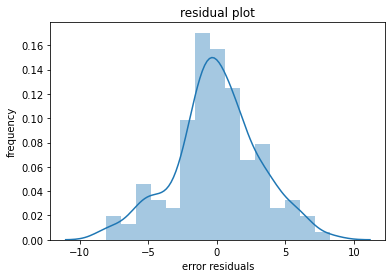

In [74]:
sns.distplot(res, bins =15)
plt.xlabel('error residuals')
plt.ylabel('frequency')
plt.title('residual plot')
plt.show()

In [75]:
y_test_pred = lm.predict(x_test)

In [76]:
res_test = y_test - y_test_pred

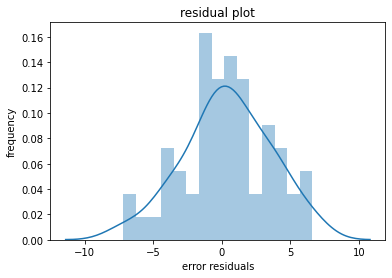

In [77]:
sns.distplot(res_test, bins =15)
plt.xlabel('error residuals')
plt.ylabel('frequency')
plt.title('residual plot')
plt.show()

In [78]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6587539495899785
0.58651666214331


In [79]:
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
print("Cross-validated R^2 scores:", scores)
print("Mean R^2:", scores.mean())

Cross-validated R^2 scores: [0.03826058 0.77290184 0.54481649 0.7644727  0.69309478]
Mean R^2: 0.5627092796702414


## Interpretation
    for model 1 Mean R^2: 0.6313058180634414
    for model 2 Mean R^2: 0.8875727579327162
    for model 3 Mean R^2: 0.8867167995631033
    for model 4 Mean R^2: 0.22359670043587737
    for model 5 Mean R^2: 0.5627092796702414

    Best Models: Model2 and Model3 perform the best, explaining nearly 89% of the variance. 
    Moderate Models: Model1 is decent but weaker than Models2 and 3.
                     Model5 is weaker but still usable if improvements are made.
    Worst Model: Model 4 performs poorly and is not suitable for this task without significant changes.